In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("DS1_C6_S3_BazilHousing_Data_Hackathon.csv")
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [27]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [28]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [29]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [30]:
cat_df=df.select_dtypes(include="object")
num_df=df.select_dtypes(exclude="object")

In [31]:
cat_df.columns

Index(['city', 'animal', 'furniture'], dtype='object')

In [32]:
num_df.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)'],
      dtype='object')

In [33]:
def info_cat(col):
    print(f'The Unique values for the column {col} are {df[col].unique()}')
    print(f'Most Frequent value for the column {col} is {df[col].mode()[0]}')
    print(f'Total missing value present in the column {col} is {df[col].isnull().sum()}')
    

In [34]:
info_cat("city")

The Unique values for the column city are ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Most Frequent value for the column city is São Paulo
Total missing value present in the column city is 0


In [35]:
def info_num(num):
    print(f'The Mean value of the column {num} is {df[num].mean()}')
    print(f'The Median value of the column {num} is {df[num].median()}')
    print(f'The Standard Deviation value for the column {num} is {df[num].std()}')
    print(f'The Missing value of the column {num} is {df[num].isnull().sum()}')

In [36]:
info_num("area")

The Mean value of the column area is 149.21791994014217
The Median value of the column area is 90.0
The Standard Deviation value for the column area is 537.0169423364867
The Missing value of the column area is 0


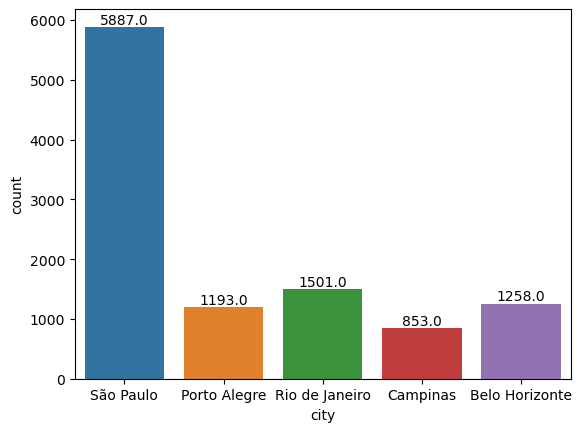

In [37]:
ci=sns.countplot(x=df["city"])
for bar in ci.patches:
    count=bar.get_height()
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ci.annotate(count,(x,y),va="bottom",ha="center")

# To find total area present in city

<Figure size 1200x800 with 0 Axes>

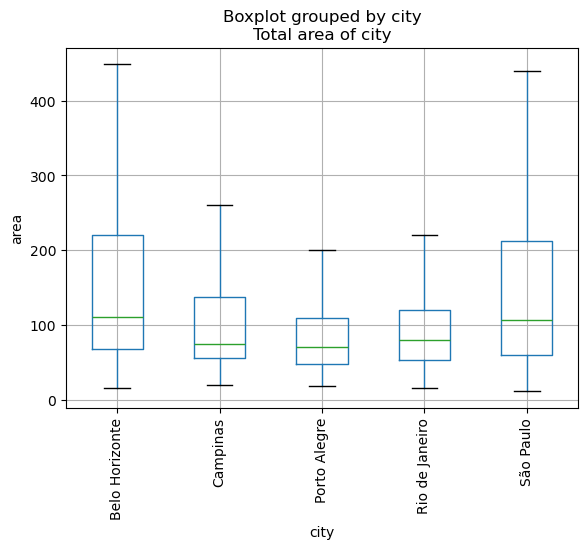

In [39]:
plt.figure(figsize=(12,8))
df.boxplot(column="area",by="city",showfliers = False)
plt.title("Total area of city")
plt.xlabel('city')
plt.ylabel('area')
plt.xticks(rotation=90)
plt.show()


# Belo Horizonte have maximum count area compare to all other area
# Campinas modrate area compare to all other area
# porto alegre have minimum count area compare to all other area

# Describe the rooms

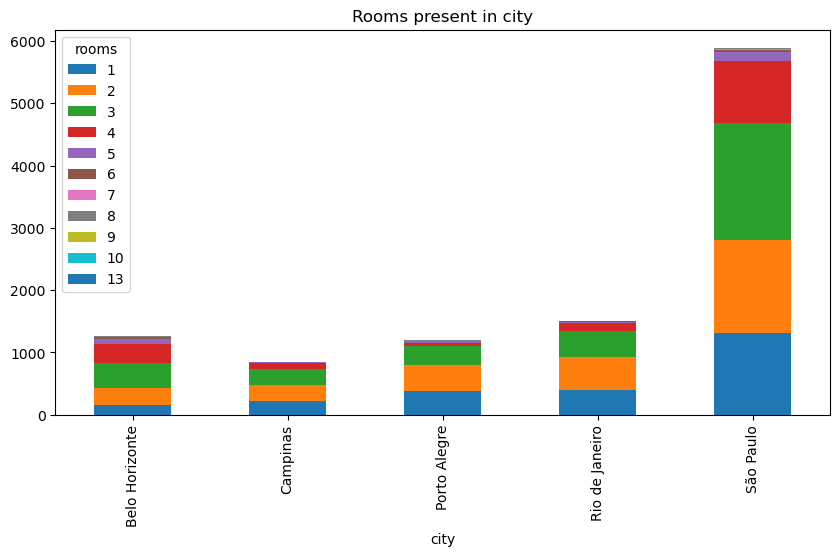

In [42]:
home=pd.crosstab(df.city,df.rooms)
home.plot(kind="bar",stacked=True,title="Rooms present in city",figsize=(10,5))
plt.show()

# belo Horizonte having maximum empty rooms
# Porto Alegre having modrate empty rooms
# compare to above two city  Campinas low rooms avialable 

# Check Bathroom in the city

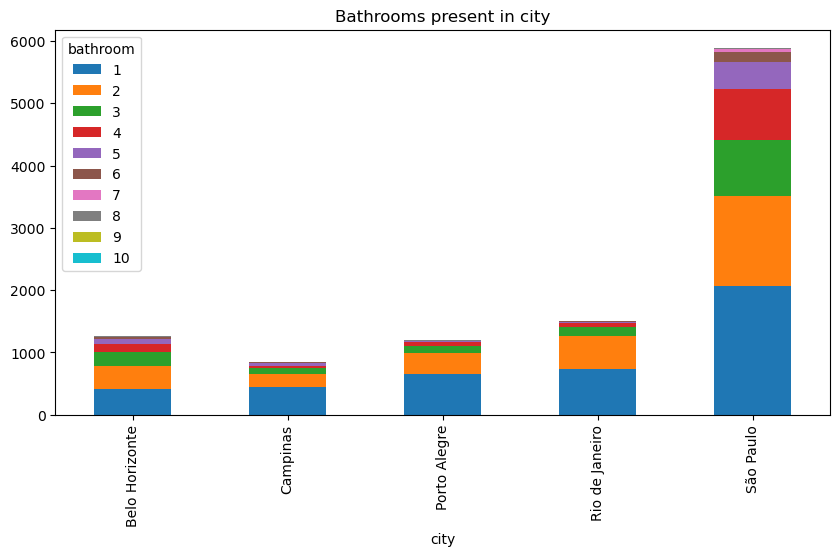

In [46]:
Bathroom=pd.crosstab(df.city,df.bathroom)
Bathroom.plot(kind="bar",stacked=True,title="Bathrooms present in city",figsize=(10,5))
plt.show()

#  belo Horizontehaving maximum Bathrooms 
# Porto Alegrehaving modrate Bathrooms
# compare to above two city Campinas low Bathrooms avialable

# Check Parking in the city

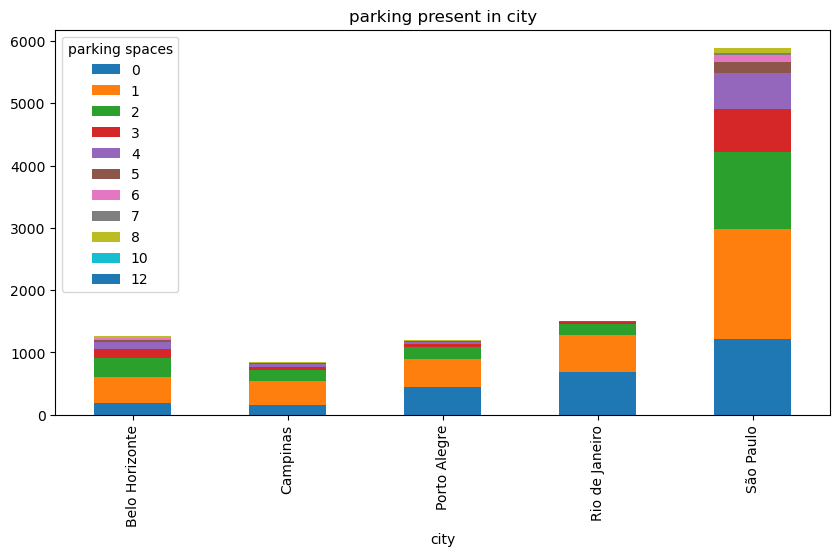

In [49]:
Parking=pd.crosstab(df.city,df["parking spaces"])
Parking.plot(kind="bar",stacked=True,title="parking present in city",figsize=(10,5))
plt.show()

# belo Horizonte having maximum Bathrooms
# Porto Alegre having modrate Bathrooms
# compare to above two city Campinas low Bathrooms avialable

# Describe Floors in the city

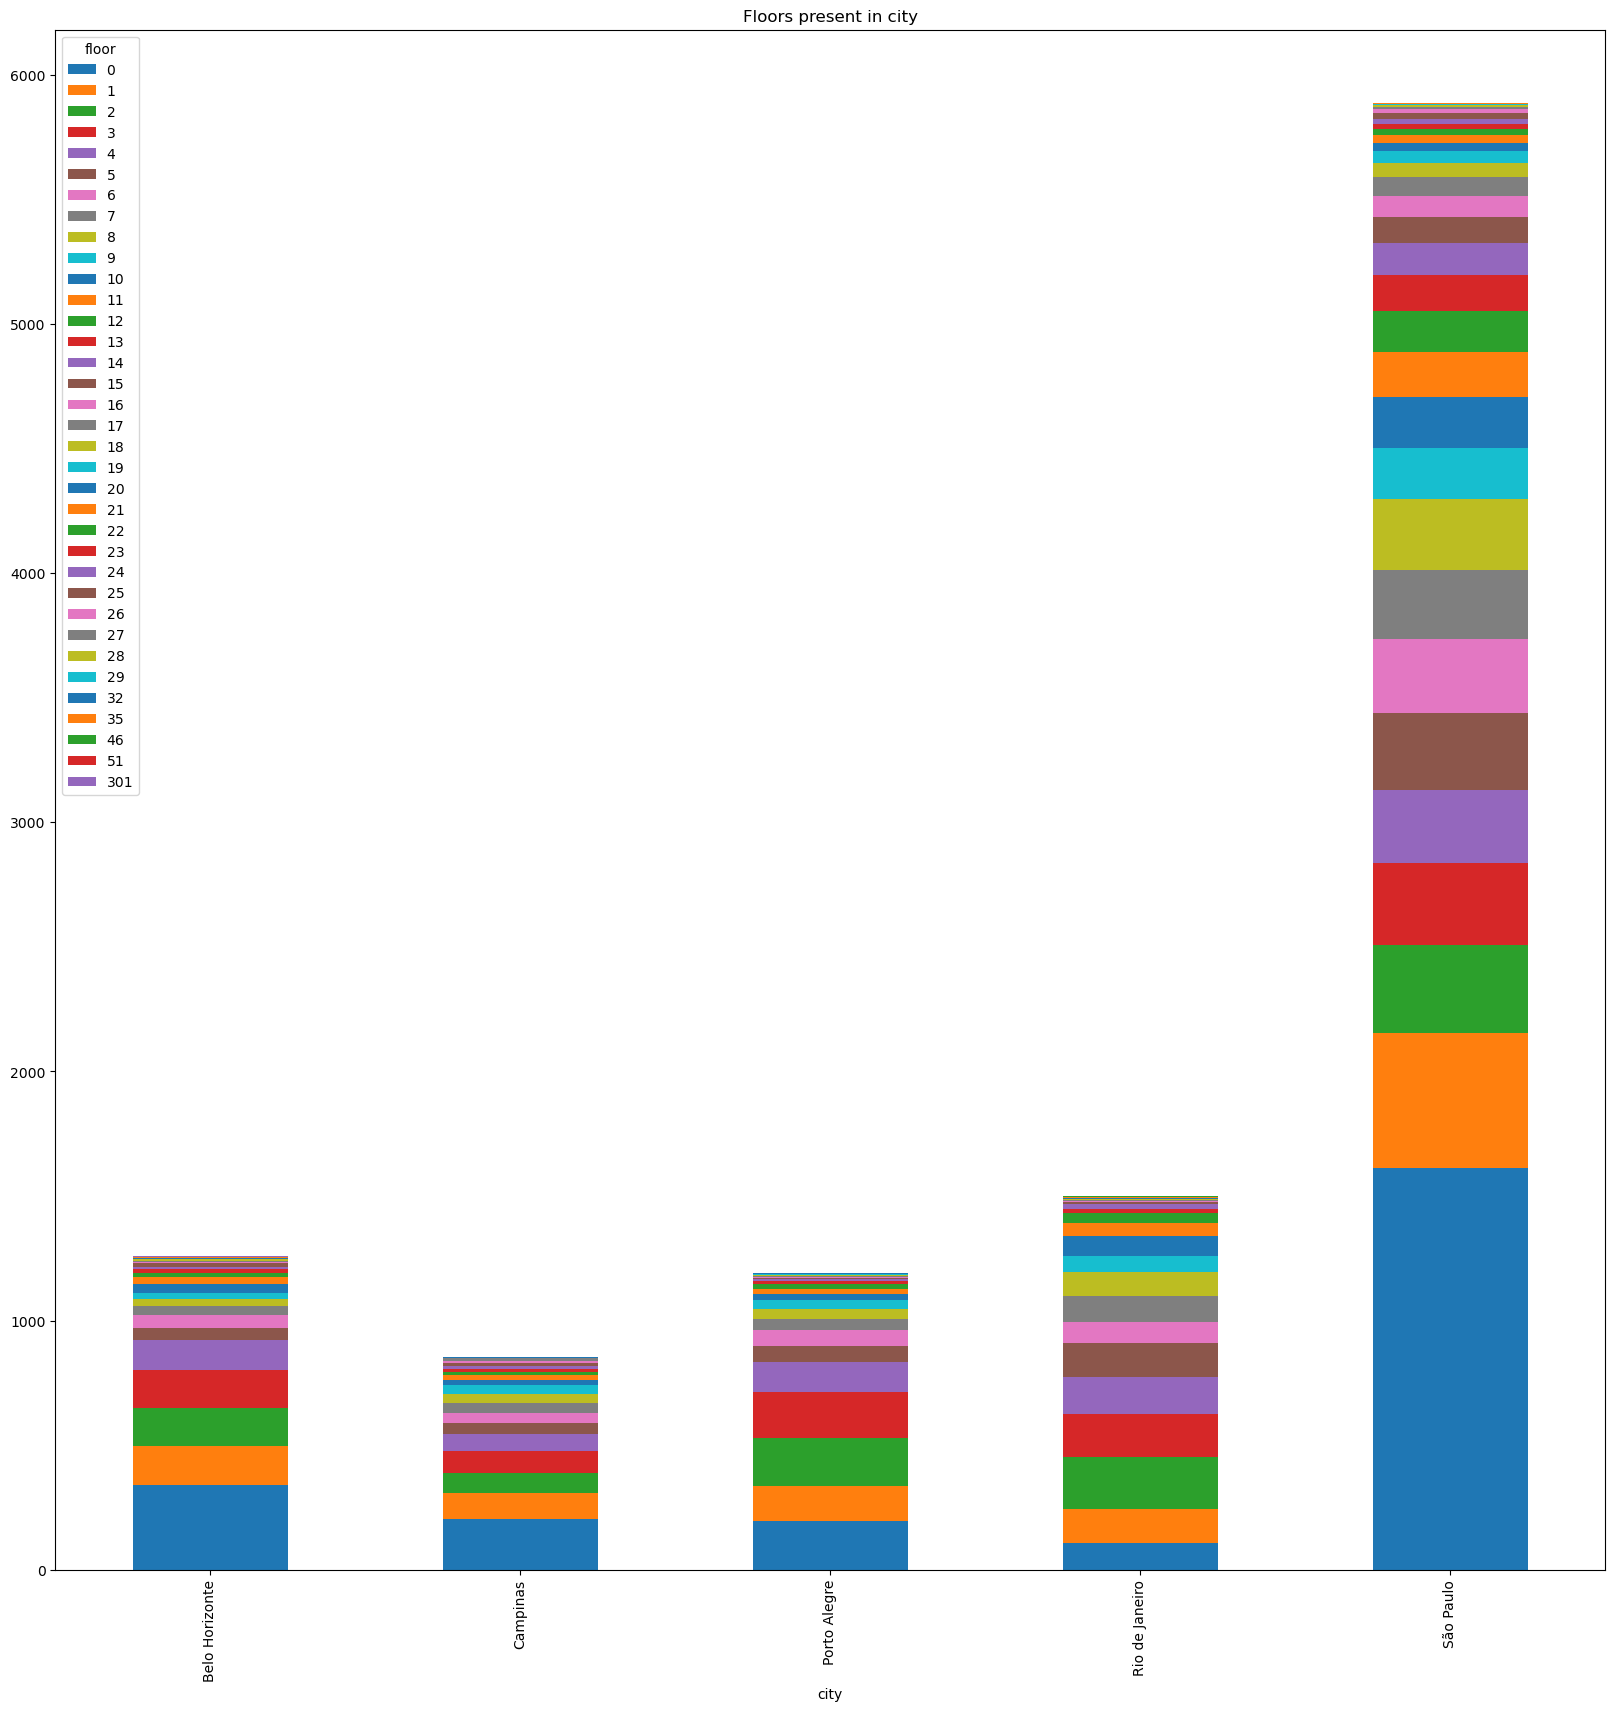

In [52]:
home=pd.crosstab(df.city,df.floor)
home.plot(kind="bar",stacked=True,title="Floors present in city",figsize=(20,20))
plt.show()

# To find Animal allowed or not-Allowed

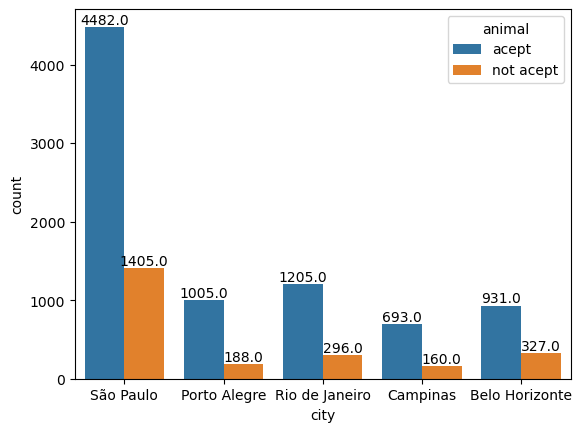

In [54]:
an=sns.countplot(x = df['city'], hue = df['animal'])
for bar in an.patches:
  count = bar.get_height()
  x = bar.get_x()+bar.get_width()/2
  y = bar.get_height()
  an.annotate(count, (x, y), va = 'bottom', ha = 'center')
plt.show()

# This Graph Showing count of animals acccept or Not Accept

# To Find the city Funiture or non-Funiture

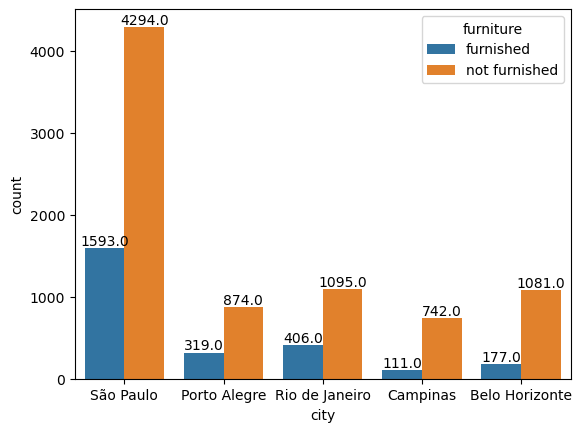

In [57]:
fu=sns.countplot(x = df['city'], hue = df['furniture'])
for bar in fu.patches:
  count = bar.get_height()
  x = bar.get_x()+bar.get_width()/2
  y = bar.get_height()
  fu.annotate(count, (x, y), va = 'bottom', ha = 'center')
plt.show()

# This graph showing count of Furniture and Non-Furniture

# Describe Homeowner association tax

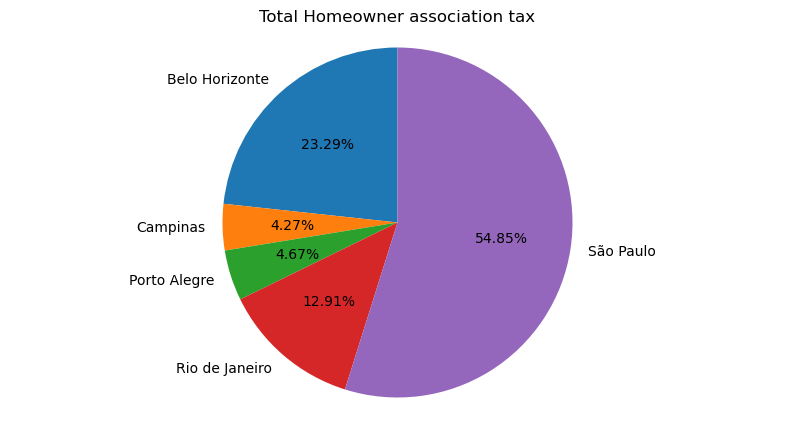

In [60]:
owner_cost=df.groupby("city")["hoa (R$)"].sum()
Total_Cost=owner_cost.sum()
owner_ratio=owner_cost/Total_Cost*100
plt.figure(figsize=(10,5))
plt.pie(owner_ratio,labels=owner_ratio.index,autopct="%0.2f%%",startangle=90)
plt.title("Total Homeowner association tax")
plt.axis("equal")
plt.show()

# *By show this graph identify porto Alegre city is low rent compare to other city
# *Next Affortabel price city is Campinas City
# *High price city is Belo Horizonte

# Describe Rent Wise city

<Figure size 1200x800 with 0 Axes>

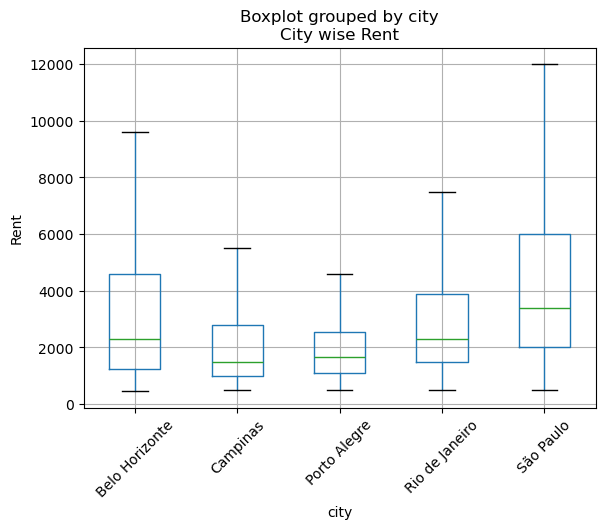

In [64]:
plt.figure(figsize=(12,8))
df.boxplot(column="rent amount (R$)",by="city",showfliers = False)
plt.title("City wise Rent")
plt.xlabel('city')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show()

# It is showing total Expense spend for the each city

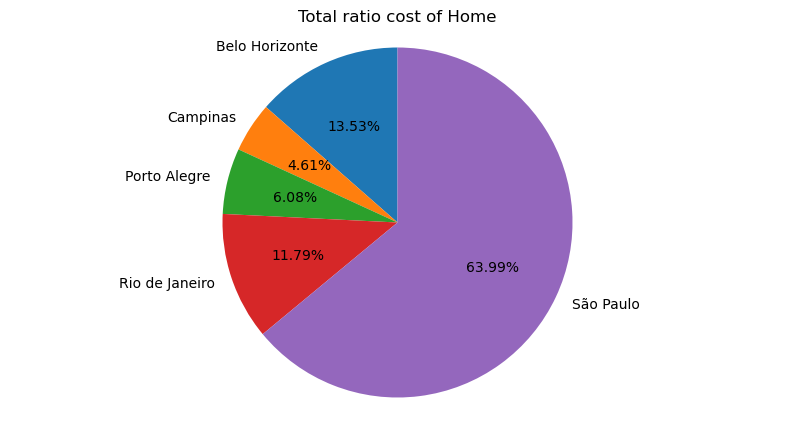

In [66]:
Home_cost=df.groupby("city")["total (R$)"].sum()
Total_Cost=Home_cost.sum()
Home_ratio=Home_cost/Total_Cost*100
plt.figure(figsize=(10,5))
plt.pie(Home_ratio,labels=Home_ratio.index,autopct="%0.2f%%",startangle=90)
plt.title("Total ratio cost of Home")
plt.axis("equal")
plt.show()

## Summary :-

# From my Analysis do my research about Brazil Housing 
# Find my solution about this alternate city to relocate

#                            Describe Belo Horizonte :-

# Area:- compare to all other city Belo Horizonte having maximum area above 400-Area
# Rooms:- Maximum Rooms are available in the Belo Horizonte
# Bathroom:-Maximum Bathrooms are available in the Belo Horizonte
# Parking space:- maximum parking area available in the Belo Horizonte
# Floor:- high no.of floors availabel in the Belo Horizonte
# pets:- 931-Area are allowed and 327 area are Not-allowed
# Furniture:- 177 house are Furniture and 1081 Not-Furniture
# Homeowner association tax:-compare all city Belo Horizonte is to pay high  
# Total cost(including all tax):- compare all city Belo Horizonte is to pay high cost for living
                                                                               

# Describe Campinas :-

# Area:- compare to all other city Campinas having modrate area above 200-Area
# Rooms:- Minimum Rooms are available in the compare to Porto Alegre
# Bathroom:-Minimum Bathrooms are available in the compare to Porto Alegre
# Parking space:- Minimum Parking Space are available in the compare to Porto Alegre
# Floor:- Minimum Floors are available in the compare to Porto Alegre
# pets:- 693-Area are allowed and 160 area are Not-allowed
# Furniture:- 111 house are Furniture and 742 Not-Furniture
# Homeowner association tax:-compare to Porto Alegre less Tax  
# Total cost(including all tax):- compare to all city low cost of house Expense                                                                             

# Describe Porto Alegre:-

# Area:- compare to all other city Porto Alegre  having modrate area  200-Area
# Rooms:- Minimum Rooms are available in the compare to Belo Horizonte,maximum rooms compare to Campinas
# Bathroom:-Minimum Bathrooms are available in the compare to Belo Horizonte,maximum Bathrooms compare to Campinas
# Parking space:- Minimum Parking Space are available in the compare to Belo Horizonte,maximum Parking space compare to Campinas
# Floor:- Minimum Floors are available in the compare to Belo Horizonte,maximum Floors compare to Campinas 
# pets:- 1005-Area are allowed and 188 area are Not-allowed
# Furniture:- 319 house are Furniture and 874 Not-Furniture
# Homeowner association tax:-compare to Campinas  more  Tax,less than Belo Horizonte  
# Total cost(including all tax):- compare to Campinas  more  total cost of house Expense,less than total cost of house Expense Belo Horizonte

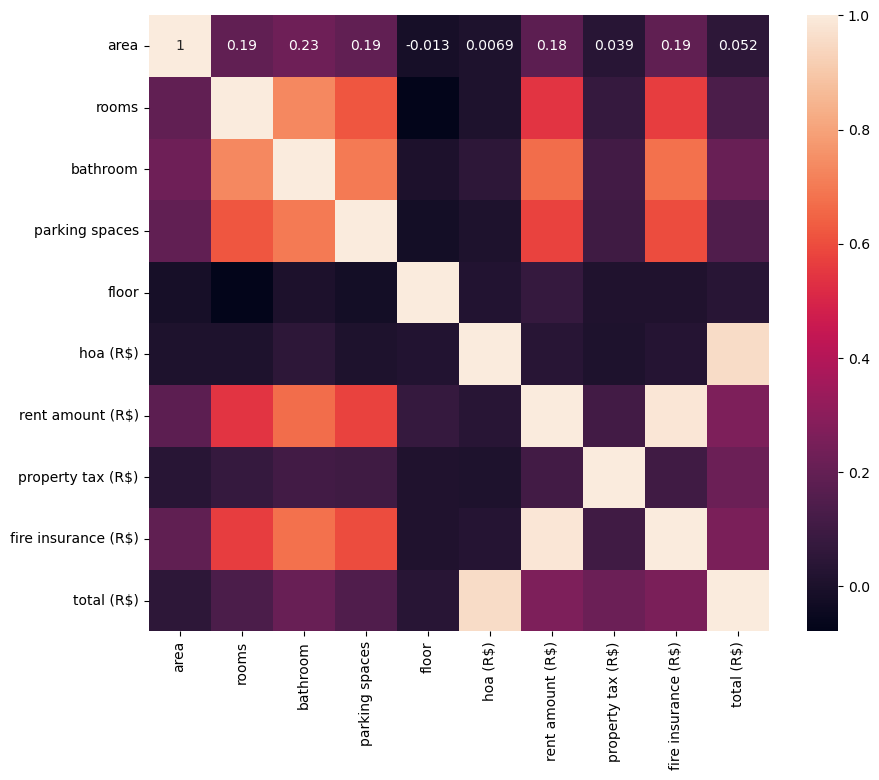

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(),annot=True)
plt.show()